# Welcome to Basic Image Classification with TensorFlow.

We want to create and train a model that takes an image of a hand written digit as input and predicts the class of that digit, that is, it predicts the digit or it predicts the class of the input image.

The Dataset used here is MNIST which is in-built into the keras library

In [1]:
import pandas as pd
import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

##  Visualizing the Image Data

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

In [6]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
single_image.shape

(28, 28)

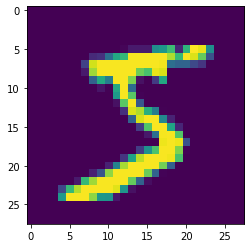

In [8]:
plt.imshow(single_image)

# PreProcessing Data


## Labels

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

# One Hot Encoding

After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:

original label	one-hot encoded label
5	[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
7	[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
1	[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_train.shape

(60000,)

In [13]:
y_example = to_categorical(y_train)

In [14]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
y_example.shape

(60000, 10)

# Display Encoded Labels

In [16]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [17]:
y_cat_test = to_categorical(y_test,10)

In [18]:
y_cat_train = to_categorical(y_train,10)

### Processing X Data

We should normalize the X data

In [21]:
single_image.max()

255

In [22]:
single_image.min()

0

In [23]:
x_train = x_train/255
x_test = x_test/255

In [24]:
scaled_single = x_train[0]

In [25]:
scaled_single.max()

1.0

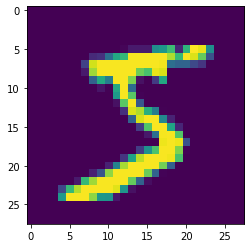

In [26]:
plt.imshow(scaled_single)

## Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [27]:
x_train.shape

(60000, 28, 28)

In [28]:
x_test.shape

(10000, 28, 28)

Reshape to include channel dimension (in this case, 1 channel)

In [29]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [30]:
x_train.shape

(60000, 28, 28, 1)

In [31]:
x_test = x_test.reshape(10000,28,28,1)

In [32]:
x_test.shape

(10000, 28, 28, 1)

# Training the Model

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [34]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# Compiling the model

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) # we can add in additional metrics https://keras.io/metrics/

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


# Early Stopping

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

## Train the Model

In [38]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.1336 - accuracy: 0.9605 - val_loss: 0.0574 - val_accuracy: 0.9806
Epoch 2/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0474 - accuracy: 0.9858 - val_loss: 0.0488 - val_accuracy: 0.9837
Epoch 3/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0305 - accuracy: 0.9900 - val_loss: 0.0398 - val_accuracy: 0.9877
Epoch 4/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0214 - accuracy: 0.9931 - val_loss: 0.0483 - val_accuracy: 0.9859
Epoch 5/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0154 - accuracy: 0.9950 - val_loss: 0.0433 - val_accuracy: 0.9867


## Evaluate the Model

In [42]:
model.metrics_names

['loss', 'accuracy']

In [43]:
losses = pd.DataFrame(model.history.history)

In [44]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.133615,0.960517,0.057365,0.9806
1,0.047404,0.985767,0.048836,0.9837
2,0.030519,0.990017,0.039769,0.9877
3,0.021383,0.993067,0.048294,0.9859
4,0.015440,0.994967,0.043253,0.9867


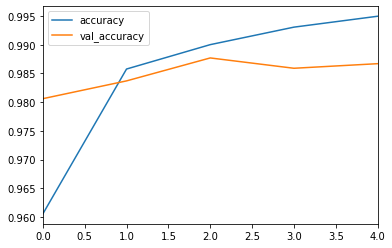

In [45]:
losses[['accuracy','val_accuracy']].plot()

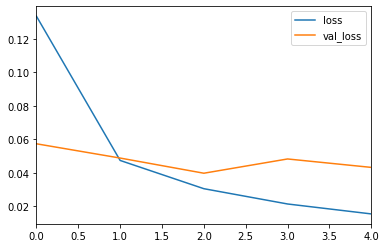

In [46]:
losses[['loss','val_loss']].plot()

In [50]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.04325260493150563, 0.9867]


# Classification and Confusion Matrix

In [52]:
from sklearn.metrics import classification_report,confusion_matrix

In [53]:
predictions = model.predict_classes(x_test)

In [54]:
y_cat_test.shape

(10000, 10)

In [55]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [56]:
predictions[0]

7

In [57]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [59]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.97      1.00      0.98       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.97      1.00      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [60]:
confusion_matrix(y_test,predictions)

array([[ 975,    0,    1,    0,    0,    0,    3,    1,    0,    0],
       [   0, 1134,    0,    0,    0,    0,    0,    1,    0,    0],
       [   1,    4, 1007,    1,    4,    0,    0,   13,    2,    0],
       [   0,    0,    5, 1000,    0,    2,    0,    2,    1,    0],
       [   0,    0,    0,    0,  979,    0,    0,    0,    0,    3],
       [   0,    0,    0,    6,    0,  883,    1,    0,    2,    0],
       [   4,    3,    0,    1,    5,    1,  943,    0,    1,    0],
       [   0,    1,    2,    0,    0,    0,    0, 1024,    1,    0],
       [   2,    1,    4,    4,    4,    0,    0,    5,  952,    2],
       [   0,    3,    0,    1,   16,    4,    0,   14,    1,  970]],
      dtype=int64)

# Predicting a given image

In [75]:
my_number = x_test[0]

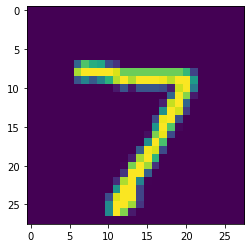

In [77]:
plt.imshow(my_number.reshape(28,28))

In [79]:
# SHAPE --> (num_images,width,height,color_channels)
model.predict_classes(my_number.reshape(1,28,28,1))

array([7], dtype=int64)